# Churn Prediction for Telcom Customers

## Library Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from collections import Counter
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import shap

In [2]:
## Read Data
data = pd.read_csv("C:/Users/Tony/Desktop/文件/Fall 2020/BAX 401/Final/Telco Customer Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
data.shape

(7043, 21)

In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.groupby('Churn')[['MonthlyCharges', 'tenure']].agg(['min', 'max', 'mean'])

MonthlyCharges                    tenure               
                 min     max       mean    min max       mean
Churn                                                        
No             18.25  118.75  61.265124      0  72  37.569965
Yes            18.85  118.35  74.441332      1  72  17.979133

In [7]:
## Change TotalCharges to numeric
data[data['TotalCharges'] == ' ']
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data['TotalCharges'].dtypes

dtype('float64')

In [8]:
## Evaluate NA values 
data['TotalCharges'].isna().sum()

11

In [9]:
## Delete NA values
data.dropna(inplace = True)
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
## Minimum, maximum and mean for MonthlyCharges, tenure and Totalcharges
data.groupby('Churn')[['MonthlyCharges', 'tenure', 'TotalCharges']].agg(['min', 'max', 'mean'])

MonthlyCharges                    tenure                TotalCharges  \
                 min     max       mean    min max       mean          min   
Churn                                                                        
No             18.25  118.75  61.307408      1  72  37.650010        18.80   
Yes            18.85  118.35  74.441332      1  72  17.979133        18.85   

                             
           max         mean  
Churn                        
No     8672.45  2555.344141  
Yes    8684.80  1531.796094

Text(0, 0.5, 'Proportion of Customers')

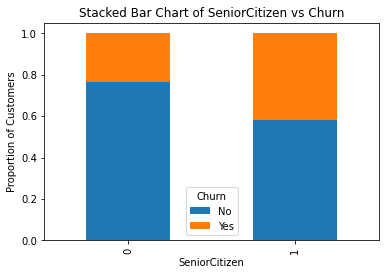

In [11]:
## Plot SeniorCitizen with Churn 
table=pd.crosstab(data.SeniorCitizen, data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Stacked Bar Chart of SeniorCitizen vs Churn')
plt.xlabel('SeniorCitizen')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

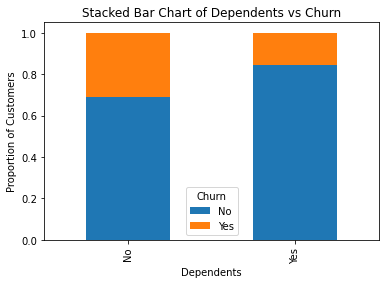

In [12]:
## Plot Dependents with Churn 
table=pd.crosstab(data.Dependents, data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Stacked Bar Chart of Dependents vs Churn')
plt.xlabel('Dependents')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

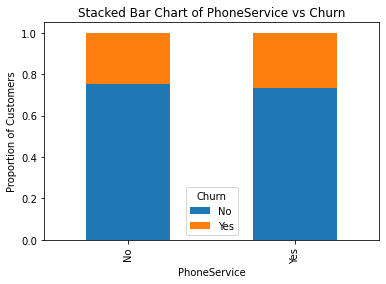

In [13]:
## Plot PhoneService with Churn 
table=pd.crosstab(data.PhoneService, data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Stacked Bar Chart of PhoneService vs Churn')
plt.xlabel('PhoneService')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

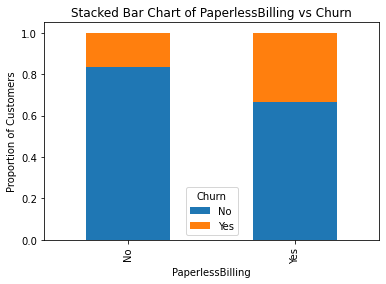

In [15]:
## Plot PaperlessBilling with Churn 
table=pd.crosstab(data.PaperlessBilling, data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Stacked Bar Chart of PaperlessBilling vs Churn')
plt.xlabel('PaperlessBilling')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

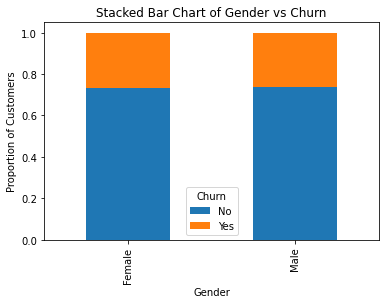

In [16]:
## Plot Gender with Churn 
table=pd.crosstab(data.gender, data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Stacked Bar Chart of Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

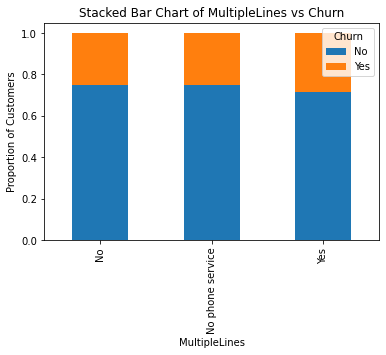

In [17]:
## Plot MultipleLines with Churn 
table=pd.crosstab(data.MultipleLines, data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Stacked Bar Chart of MultipleLines vs Churn')
plt.xlabel('MultipleLines')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

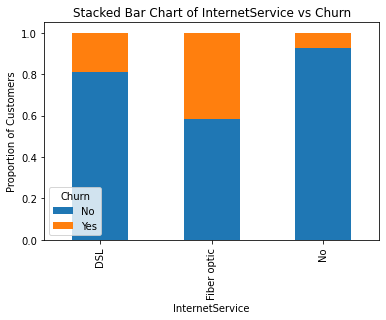

In [18]:
## Plot InternetService with Churn 
table=pd.crosstab(data.InternetService, data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Stacked Bar Chart of InternetService vs Churn')
plt.xlabel('InternetService')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

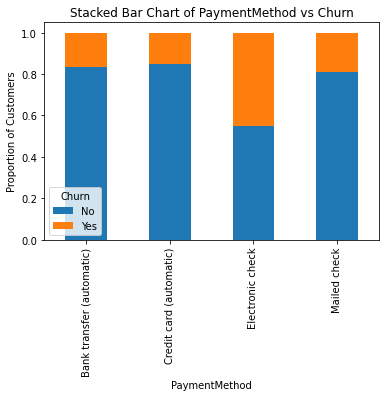

In [19]:
## Plot PaymentMethod with Churn 
table=pd.crosstab(data.PaymentMethod, data.Churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True)
plt.title('Stacked Bar Chart of PaymentMethod vs Churn')
plt.xlabel('PaymentMethod')
plt.ylabel('Proportion of Customers')

In [20]:
## Selecting features for model and standardize categorical variables
encoder = LabelEncoder()
categorical_features = ['gender','Partner','Dependents','PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for label in categorical_features:
    data[label] = encoder.fit_transform(data[label])

X_features = data.iloc[:, 1:-1]
y = data.iloc[:,-1:]
y = y.replace({'No': 0, 'Yes': 1})
df = pd.DataFrame(X_features)
df.iloc[[11]]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
11,1,0,0,0,16,1,0,2,1,1,1,1,1,1,2,0,1,18.95,326.8


In [21]:
data['Churn'] = data['Churn'].map({'Yes' : 1, 'No' : 0})

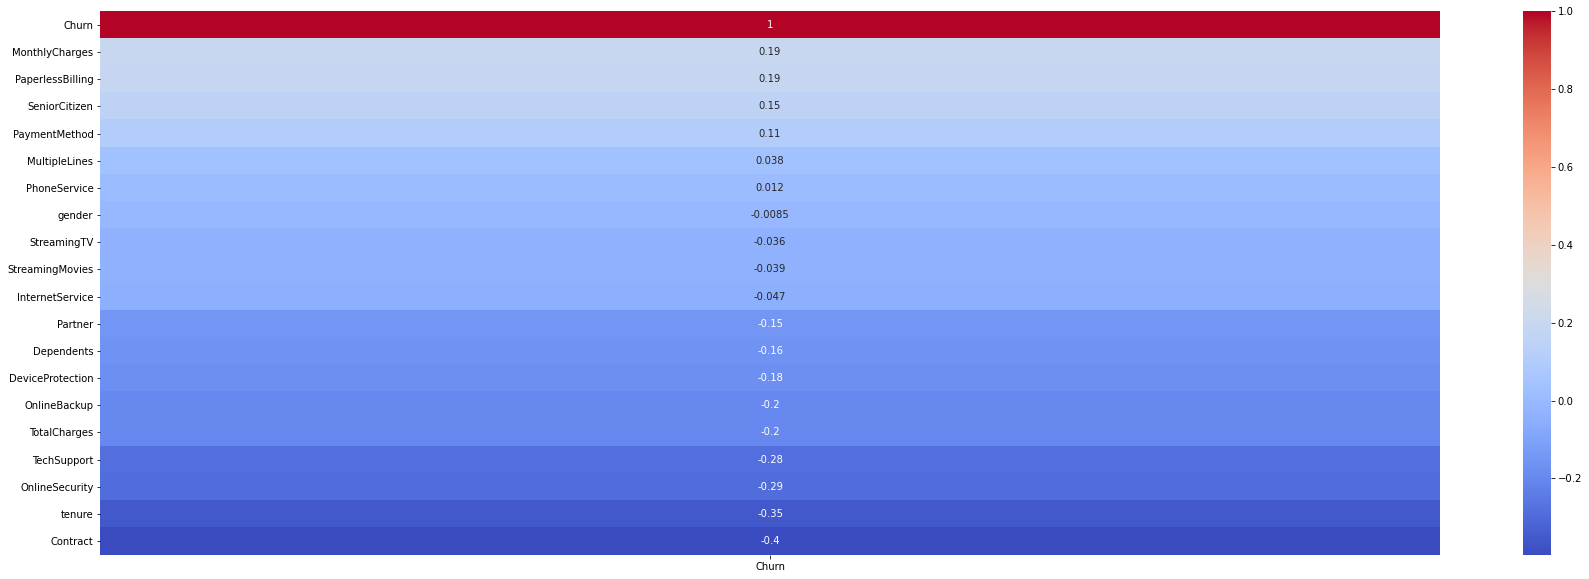

In [22]:
## Test for correlation between selected variables
data.corr()
dfCorr = data.corr()[["Churn"]]
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr != 1.000)]
dfCorr_sorted = data.corr()[["Churn"]].sort_values("Churn", ascending=False)
plt.figure(figsize=(30,10))
sns.heatmap(dfCorr_sorted, annot=True, cmap="coolwarm")
plt.show()

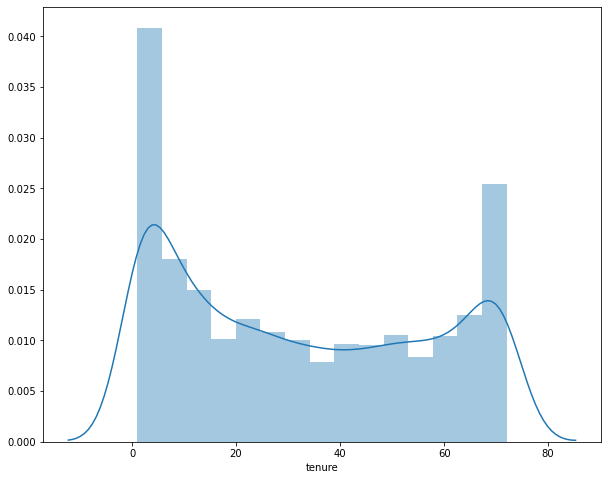

In [23]:
## Plot tenure distribution
plt.figure(figsize = (10,8))
ax = sns.distplot(data['tenure'])

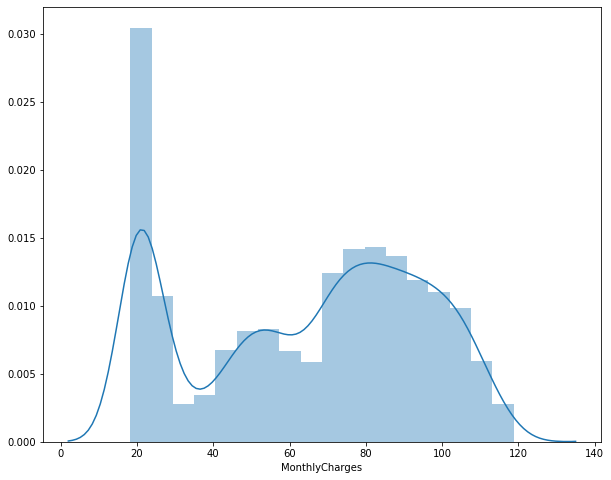

In [24]:
## Plot monthly charges distribution
plt.figure(figsize=(10,8))
sns.distplot(data['MonthlyCharges'])

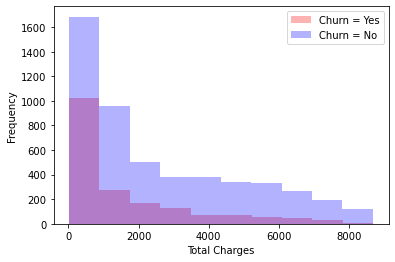

In [25]:
## Plot Total Charges with churn 
data[data['Churn'] == 1].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = 'red', label = 'Churn = Yes')
data[data['Churn'] == 0].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = 'blue', label = 'Churn = No')
plt.xlabel('Total Charges')
plt.legend();

In [26]:
## Data Selection
data1 = data[['Churn', 'SeniorCitizen', 'InternetService', 'PaymentMethod', 'tenure', 'MonthlyCharges']]

# Model Building 

In [27]:
## Splitting Data
X = data1.drop('Churn', axis=1)
y = data1['Churn']

In [28]:
## Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

In [29]:
def roc_auc_plot(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

# Logistic Regression Model

In [30]:
def logistic(X_train, y_train):
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    log_y_pred_train = logreg.predict(X_train)
    log_test_as = metrics.accuracy_score(y_pred, y_test)
    log_train_as = metrics.accuracy_score(log_y_pred_train, y_train)
    y_prob = logreg.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    print("=============Confusion Matrix=============")
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print("=============Key Metrics==================")
    print(classification_report(y_test, y_pred))
    print("=============ROC AUC======================")
    roc_auc_plot(fpr, tpr, roc_auc)
    print('AUC:', roc_auc)
    print(f"Accuracy score for test data : {log_test_as}")
    print(f"Accuracy score for train data : {log_train_as}")

=============Confusion Matrix=============
[[1551  160]
 [ 332  278]]


=============Key Metrics==================
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1711
           1       0.63      0.46      0.53       610

    accuracy                           0.79      2321
   macro avg       0.73      0.68      0.70      2321
weighted avg       0.77      0.79      0.78      2321

=============ROC AUC======================


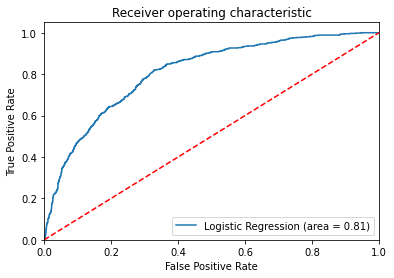

AUC: 0.8088012953789846
Accuracy score for test data : 0.7880224041361482
Accuracy score for train data : 0.7926130333262577


In [31]:
logistic(X_train, y_train)

# Random Forest Classifier

In [32]:
def roc_auc_plot(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Rfc_ROC')
    plt.show()

=============Confusion Matrix=============
[[1535  176]
 [ 312  298]]


=============Key Metrics==================
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1711
           1       0.63      0.49      0.55       610

    accuracy                           0.79      2321
   macro avg       0.73      0.69      0.71      2321
weighted avg       0.78      0.79      0.78      2321

=============ROC AUC======================


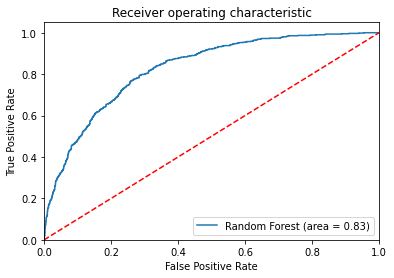

AUC: 0.8267670138256795
Accuracy score for test data : 0.7897457992244722
Accuracy score for train data : 0.8361282105710041


Wall time: 0 ns


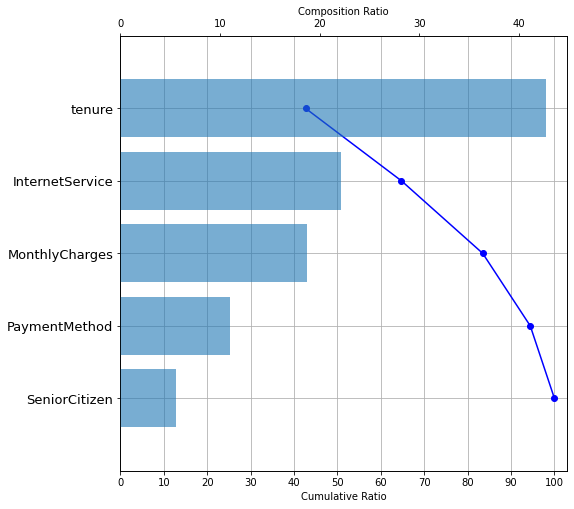

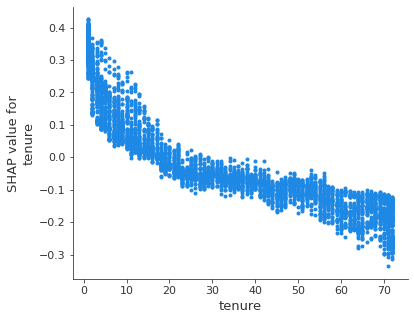

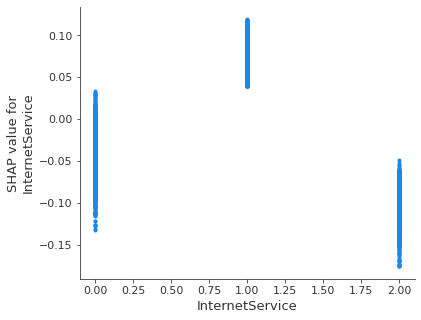

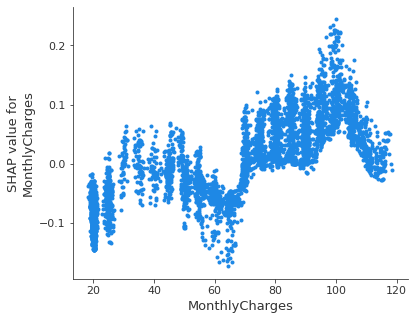

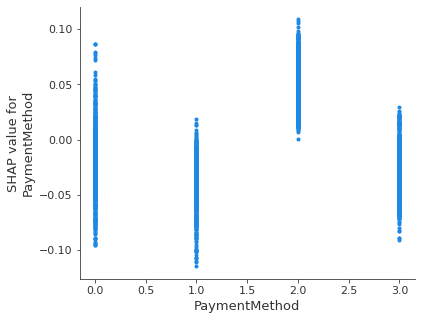

In [33]:
rfc = RandomForestClassifier(n_estimators = 1800, min_samples_split = 2, min_samples_leaf = 5, max_features = 'sqrt', 
                            max_depth = 10, bootstrap = True)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
y_pred_train_rf = rfc.predict(X_train)
rf_as = metrics.accuracy_score(y_test, y_pred)
rf_as_train = metrics.accuracy_score(y_train, y_pred_train_rf)


print("=============Confusion Matrix=============")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=============Key Metrics==================")
print(classification_report(y_test, y_pred))
print("=============ROC AUC======================")
roc_auc_plot(fpr, tpr, roc_auc) 
print('AUC:', roc_auc)
print(f"Accuracy score for test data : {rf_as}")
print(f"Accuracy score for train data : {rf_as_train}")

## Shap Plots preparation
shap.initjs()

# Let us have a look on SHAP summary plot
%time
samples = X_train

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

def make_shap_waterfall_plot(shap_values, features, num_display=20):
    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))
    
# Shap waterfall plot
make_shap_waterfall_plot(shap_values[1], samples)

# Let's have a look on the top features and their dependence plots
top_features = ['tenure', 'InternetService', 'MonthlyCharges', 'PaymentMethod']

# Shap Dependence Plot for top features
for feature in top_features:
    shap.dependence_plot(feature, shap_values[1], samples, interaction_index=None)

# Tuning Parameters

In [34]:
rfc = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.8s


KeyboardInterrupt: 

In [ ]:
rfc_random.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [1600, 1700, 1800]
}
# Create a base model
rfc = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_